# Cogs 109: Modeling and Data Analysis
## Final project guidelines, 2019

Work in teams of at least 2 and no more than 4 students. Every student in the group will be expected to contribute substantially to the final product(s), and all students should be able to understand and explain all aspects of the project when you present your work in the final symposium.

Your project should. 
- Identify a real problem, challenge or scientific question which could benefit from data analysis and modeling. Your final report must explain why the question is interesting or important. 
- Identify a relevant data set. You should learn about how the data was collected and be able to explain key features of the data, for example: How many observations? What are the noise sources? What are the relevant predictors?
Identify at least one relevant data analysis approach, choosing from the methods covered in the course (linear or nonlinear regression, classification, clustering, PCA, etc.). Explain why this analysis approach is appropriate for addressing your question.
- Identify and explain one or more hypotheses or initial expectation that you will test using the data.
- Model selection: You should compare and contrast multiple different models (at least 2, but usually more). Your comparison should make use of cross-validation, bootstrap sampling, regularization, and/or other relevant techniques. For example, you might compare K-Nearest Neighbors classification for a range of k values (k=1,2,…,50), and select the k value that provides the lowest test set (cross-validation) error.
- Model estimation: Implement your data analysis and present the results using a combination of data visualizations (box plots, scatter plots), statistical analyses and models.
- Present your conclusions and outlook for next steps/future directions.

The final product will be a written report, 5-10 pages in length. In addition, you will create a poster explaining your project to be presented in a symposium session on the last day of class. We will provide more information about the final paper and poster in a few weeks.


## Written report:
Your final report must include the following sections (use these headings).
- Introduction. 
    - Define the real problem and explain its motivation
    - Identify the dataset you will use and explain its key characteristics.
    - Explain at least one hypothesis that you will test.
- Methods. Identify the data analysis approach you will use and explain the rationale/motivation for your choice of this approach.
- Results
    - Model selection. You MUST compare at least 2 models, using cross-validation, regularization, and/or other relevant techniques.
    - Model estimation. What are the final parameter estimates? What is the final accuracy of the model’s predictions?
    - Conclusions and discussion. What can you conclude about your hypothesis? (Note that negative or ambiguous results are perfectly acceptable, you just need to explain what you found.) What are some potential implications/next steps for researchers interested in this topic?


In [1]:
import requests
import time
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from scipy import linalg
from sklearn.linear_model import Ridge
from pytrends.request import TrendReq
from pytrends import dailydata
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

Using TensorFlow backend.


In [2]:
# Define company variables
companies = ['tesla', 'facebook', 'microsoft', 'amazon', 'google', 'uber', 'lyft', 'apple', 'snap']
key_terms = ['report', 'good', 'bad', 'up', 'down', 'stock']
company_symbol = ['TSLA', 'FB', 'MSFT', 'AMZN', 'GOOGL', 'UBER', 'LYFT', 'AAPL', 'SNAP']

In [3]:
# Create Key Words List for Pytrends
kw_list = []
for c_name in companies:
    for k in key_terms:
        kw_list.append(c_name + " " + k)

# Gather Hourly Data from Pytrends 

In [22]:
# Get Hourly trends data from pytrends
df = pd.DataFrame()
pytrends = TrendReq(hl='en-US', tz=360)
for kw in kw_list:
    print(kw)
    df_temp = pytrends.get_historical_interest([kw], year_start=2019, month_start=11, day_start=18, hour_start=0, year_end=2019, month_end=11, day_end=22, hour_end=23,sleep=30, cat=0, geo='', gprop='')
    if 'isPartial' in df_temp.columns: 
        df_temp = df_temp.drop(['isPartial'], axis=1)
    if df.empty:
        df = df_temp
    else:
        df = df.join(df_temp)

tesla report
tesla good
tesla bad
tesla up
tesla down
tesla stock
facebook report
facebook good
facebook bad
facebook up
facebook down
facebook stock
microsoft report
microsoft good
microsoft bad
microsoft up
microsoft down
microsoft stock
amazon report
amazon good
amazon bad
amazon up
amazon down
amazon stock
google report
google good
google bad
google up
google down
google stock
uber report
uber good
uber bad
uber up
uber down
uber stock
lyft report
lyft good
lyft bad
lyft up
lyft down
lyft stock
apple report
apple good
apple bad
apple up
apple down
apple stock
snap report
snap good
snap bad
snap up
snap down
snap stock


In [23]:
#print(df.head())
#print(df.shape)
#print(df.index)
df.tail()

,tesla report,tesla good,tesla bad,tesla up,tesla down,tesla stock,facebook report,facebook good,facebook bad,facebook up,...,apple bad,apple up,apple down,apple stock,snap report,snap good,snap bad,snap up,snap down,snap stock
date,,,,,,,,,,,,,,,,,,,,,
2019-11-22 19:00:00,89,92,51,100,66,33,37,39,28,9,...,71,8,20,8,3,13,22,27,64,3
2019-11-22 20:00:00,65,71,40,98,68,30,39,40,24,8,...,61,8,23,8,3,12,14,27,50,3
2019-11-22 21:00:00,78,70,55,92,75,28,40,45,25,9,...,66,9,19,8,3,13,15,29,39,4
2019-11-22 22:00:00,77,87,55,88,61,27,44,43,23,9,...,61,9,19,7,3,14,19,40,49,3
2019-11-22 23:00:00,68,100,47,83,73,25,47,45,23,9,...,80,10,24,5,5,11,19,36,41,2


In [24]:
# worldTradingData_APIKey = ''
# def getWorldTradingData_Intraday1min(symbol, days=1, interval=1) :
#     # limits on the inputs https://www.worldtradingdata.com/documentation#stock-and-index-intraday
#     link = "https://intraday.worldtradingdata.com/api/v1/intraday?symbol={}&range={}&interval={}&api_token={}"\
#         .format(symbol, days, interval, worldTradingData_APIKey)
#     request = requests.get(link)
#     data = json.loads(request.text)
#     if 'intraday' not in data:
#         return pd.DataFrame()
#     stock_data = json.dumps(data["intraday"])
#     df = pd.read_json(stock_data).transpose()
#     cols = ['open', 'high', 'low', 'close', 'volume']
#     df = df[cols]
#     df.reset_index(level=0, inplace=True)
#     df.columns = ['times', 'open', 'high', 'low', 'close', 'volume']
#     return df

In [25]:
# # getting data from World Tradiing Data
# df_stocks = {}
# for s in company_symbol:
#     print(s)
#     res = getWorldTradingData_Intraday1min(s)
#     while res.empty:
#         time.sleep(10)
#         res = getWorldTradingData_Intraday1min(s)
#     df_stocks[s] = getWorldTradingData_Intraday1min(s)

# Gather Stock Data from Alpha Vantage

In [52]:
# Gather Stock Data for each company and return dataframe 
ts = 'TIME_SERIES_INTRADAY'#'TIME_SERIES_DAILY'
interval = '60min'
api_key = 'E19YNB8R4JKN32DV' 
outputsize = 'full' # compact= 100 results, full= all data (5 days?)
def getIntraday1minDF(symbol): 
    link = 'https://www.alphavantage.co/query?function={}&symbol={}&interval={}&apikey={}&outputsize={}'\
        .format(ts, symbol, interval, api_key, outputsize)
    request = requests.get(link)
    data = json.loads(request.text)
    if "Time Series (60min)" not in data:
        print("data limit reached")
        return pd.DataFrame()
    stock_data = json.dumps(data["Time Series (60min)"])
    df = pd.read_json(stock_data).transpose()
    cols = ['1. open', '2. high', '3. low', '4. close', '5. volume']
    df = df[cols]
    df.reset_index(level=0, inplace=True)
    df.columns = ['times', 'open', 'high', 'low', 'close', 'volume']
    return df

In [53]:
# Gather stock data for each individual company
df_stocks = {}
for s in company_symbol:
    print(s)
    res = getIntraday1minDF(s)
    # data limit reached
    while res.empty:
        time.sleep(10)
        res = getIntraday1minDF(s)
    # add stock information to dictionary
    df_stocks[s] = res

TSLA
FB
MSFT
AMZN
GOOGL
UBER
data limit reached
data limit reached
data limit reached
LYFT
AAPL
SNAP


In [55]:
df_stocks['TSLA'].tail()

,times,open,high,low,close,volume
412,2019-09-06 13:30:00,229.0136,229.6400,228.5000,228.6000,379831.0
413,2019-09-06 12:30:00,228.7685,229.5429,227.9234,229.0384,345214.0
414,2019-09-06 11:30:00,227.6145,229.5105,227.5790,228.7695,514473.0
415,2019-09-06 10:30:00,226.7260,228.0207,226.5193,227.5410,579288.0
416,2019-09-06 09:30:00,228.2103,228.9644,225.3909,226.7013,1511877.0


# Join Hourly Pytrends Data and Alpha Vantage Stock Data

In [56]:
# join Google Trends Data with Stock Market Data
df_trends_stocks = {}
def cleanAndJoinData():
    for s,c in zip(company_symbol, companies):
        print(c)
        company_names = [x for x in list(df.columns.values) if c in x]
        df_temp_trends = df[company_names]
        
        # line up indexes 
        stock_times = list(df_stocks[s].times)
        trends_times = list(df_temp_trends.index)
        joint_times = list(set(stock_times) & set(trends_times)) 
        
        
        df_temp_stocks = df_stocks[s].loc[df_stocks[s]['times'].isin(joint_times)]
        df_temp_stocks = df_temp_stocks.reset_index()
        df_temp_stocks = df_temp_stocks.iloc[::-1]
        df_temp_trends = df_temp_trends.loc[df_temp_trends.index.isin(joint_times)]
        df_temp_trends = df_temp_trends.reset_index()
        df_temp_trends.columns = ['_'.join(x.split()) for x in list(df_temp_trends.columns) if len(x) > 1]
        df_trends_stocks[c] = df_temp_stocks.join(df_temp_trends)
cleanAndJoinData()

tesla
facebook
microsoft
amazon
google
uber
lyft
apple
snap


In [29]:
#check this is populated
print(df_trends_stocks['tesla'].head())

    index               times    open     high      low   close    volume  \
34    110 2019-11-18 10:00:00  352.92  353.170  348.500  350.62  880502.0   
33    108 2019-11-18 11:00:00  350.20  350.380  348.581  348.68  396033.0   
32    106 2019-11-18 12:00:00  347.86  348.900  347.374  348.74  234635.0   
31    104 2019-11-18 13:00:00  347.29  348.260  346.880  348.23  202193.0   
30    102 2019-11-18 14:00:00  348.72  350.051  348.680  349.49  236589.0   

                  date  tesla_report  tesla_good  tesla_bad  tesla_up  \
34 2019-11-22 16:00:00           100          87         47        84   
33 2019-11-22 15:00:00            75          72         47        81   
32 2019-11-22 14:00:00            77          66         41        80   
31 2019-11-22 13:00:00            74          55         29        78   
30 2019-11-22 12:00:00            52          35         28        80   

    tesla_down  tesla_stock  
34          66           40  
33          70           45  
32      

In [46]:
df_trends_stocks['apple'].head()

,index,times,open,high,low,close,volume,date,apple_report,apple_good,apple_bad,apple_up,apple_down,apple_stock,mid
34,110,2019-11-18 10:00:00,266.04,266.17,264.270,264.61,4012650.0,2019-11-22 16:00:00,53,36,52,7,18,8,0.9500
33,108,2019-11-18 11:00:00,264.92,265.40,264.835,265.24,1018300.0,2019-11-22 15:00:00,57,36,55,7,18,9,0.2825
32,106,2019-11-18 12:00:00,265.48,266.08,265.470,265.99,1116966.0,2019-11-22 14:00:00,46,32,56,6,13,7,0.3050
31,104,2019-11-18 13:00:00,265.58,266.51,265.470,266.35,1019163.0,2019-11-22 13:00:00,35,28,40,5,12,4,0.5200
30,102,2019-11-18 14:00:00,266.71,266.97,266.670,266.84,1009880.0,2019-11-22 12:00:00,37,25,38,4,11,3,0.1500


# Test Using Keras 

In [31]:
# Split Training and Testing Partitions
train_size = 28
train_data = {}
test_data = {}
for c in companies:
    train_temp = df_trends_stocks[c][:train_size]
    test_temp = df_trends_stocks[c][train_size:]
    train_data[c] = train_temp
    test_data[c] = test_temp

In [32]:
# scale data to be between 0-1 
def predictCompany(company_name, train_size):
    df_temp = df_trends_stocks[company_name]
    # average price at opening and closing 
    df_temp['mid'] = (df_temp['high'] - df_temp['low']) / 2
    cols = [company_name+'_'+ x for x in key_terms]
    # scale data to be between 0-1 including average
    sc = MinMaxScaler(feature_range = (0, 1))
    data_set_scaled = sc.fit_transform(df_temp[cols+['mid']])
    
    #split training data 
    train = data_set_scaled[:train_size, :]
    test = data_set_scaled[train_size:, :]
    train_X, train_y = train[:, :-1], train[:, -1]
    test_X, test_y = test[:, :-1], test[:, -1]
    train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
    test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
    
    #create model
    model = Sequential()
    model.add(LSTM(train_size, input_shape=(train_X.shape[1], train_X.shape[2])))
    model.add(Dense(1))
    model.compile(loss='mae', optimizer='adam')
    
    #train model
    history = model.fit(train_X, train_y, epochs=500, batch_size=72, validation_data=(test_X, test_y), verbose=0, shuffle=False)
    return history, model, train_X, train_y, test_X, test_y

In [33]:
# Plot MSE train/test
def plotHistory(history):
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='test')
    plt.legend()
    plt.show()
#plotHistory(history)

In [34]:
# Plot test and training set predictions over true data
def plotPrediction(company, train_size, model, train_X, train_y, test_X, test_y):
    plt.plot(range(len(train_y)+len(test_y)) , list(np.array(train_y))+list(np.array(test_y)), range(len(train_y)), model.predict(train_X), '-', range(len(train_y), len(train_y)+len(test_y)), model.predict(test_X), '-')
    plt.xlabel('Day')
    plt.ylabel('Profit from previous day')
    plt.title('FB Keras - Stock Market Mid per Day from 3 months until today')
    plt.legend(["True Data","Training Data - Price change prediction", "Testing Data - Price change prediction"])
    plt.show()

In [35]:
# Plot Predictions for Each Company
def plotCompanies(companies, train_size): 
    for company in companies: 
        # Fit model and predict for each company
        history, model, train_X, train_y, test_X, test_y = predictCompany(company, train_size)
        # Plot Prediction Against True Profit for Each Company
        plotPrediction(company, train_size, model, train_X, train_y, test_X, test_y)
        # Plot Error for Each Company
        plotHistory(history)     

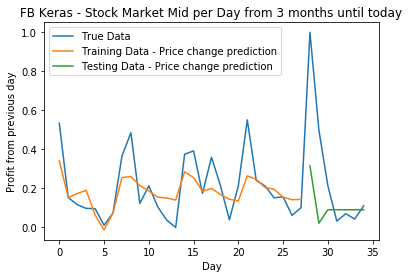

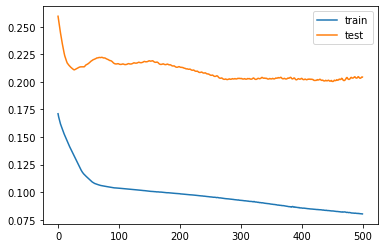

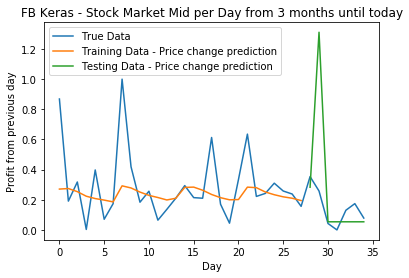

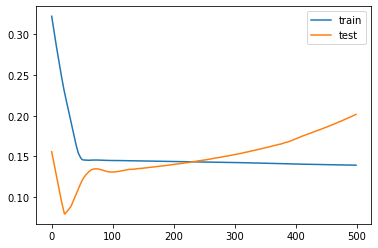

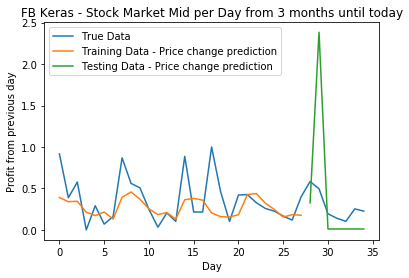

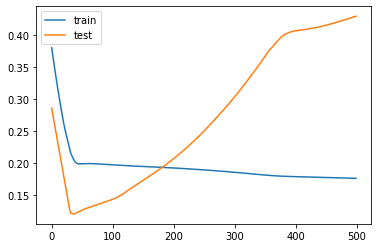

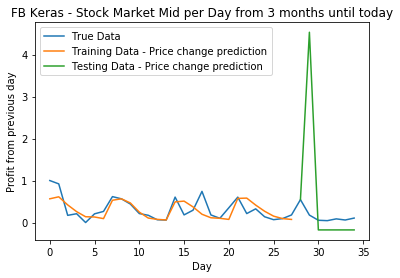

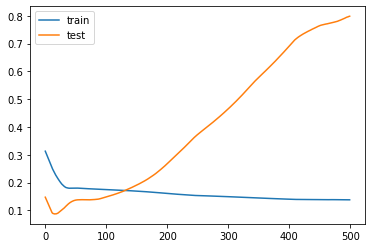

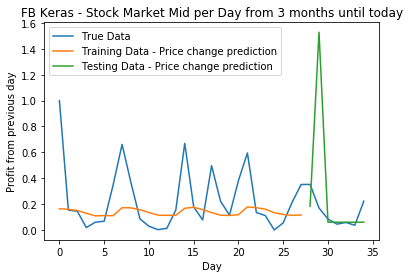

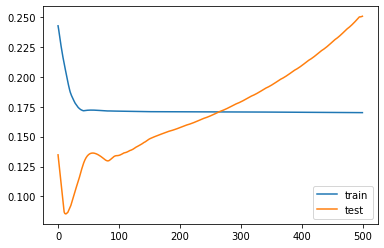

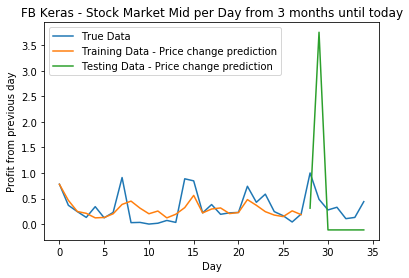

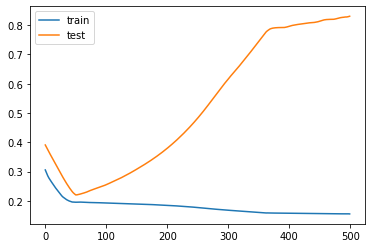

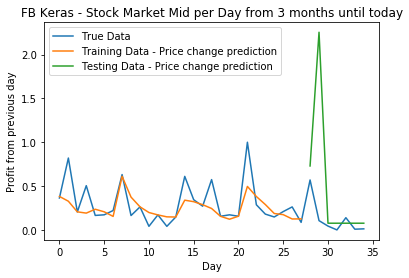

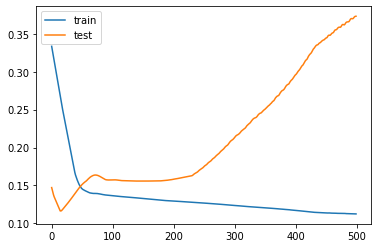

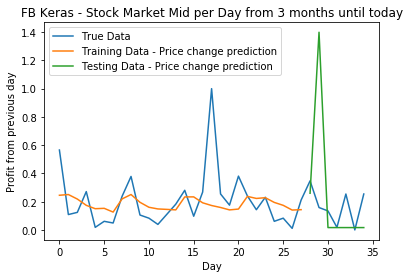

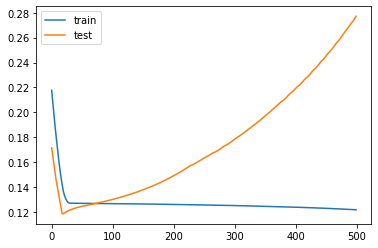

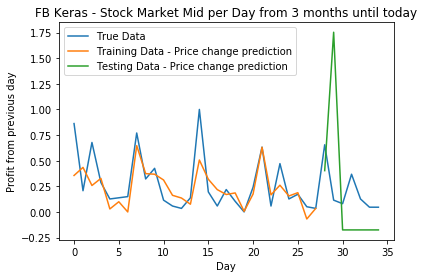

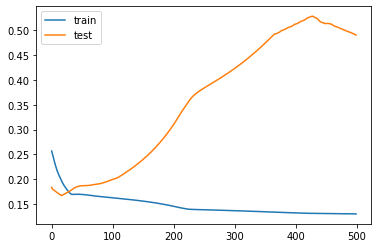

In [36]:
plotCompanies(companies, train_size)

In [37]:
#history, model, train_X, train_y, test_X, test_y = predictCompany('google',28)

In [38]:
#plotPrediction('google', train_size, model, train_X, train_y, test_X, test_y)

In [39]:
#history, model, train_X, train_y, test_X, test_y = predictCompany('facebook',28)

In [40]:
#plotPrediction('facebook', train_size, model, train_X, train_y, test_X, test_y)

In [41]:
#history, model, train_X, train_y, test_X, test_y = predictCompany('microsoft',28)

In [42]:
#plotPrediction('microsoft', train_size, model, train_X, train_y, test_X, test_y)

In [43]:
#history, model, train_X, train_y, test_X, test_y = predictCompany('apple',28)

In [44]:
#plotPrediction('apple', train_size, model, train_X, train_y, test_X, test_y)